Populating the interactive namespace from numpy and matplotlib


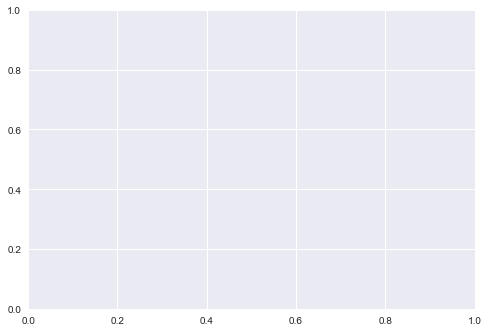

In [2]:
%pylab inline
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

from IPython.core.magic import register_cell_magic
import pandas as pd
import numpy as np
plt.ticklabel_format(style='plain', axis='y')

In [3]:
bechdelDataset = pd.read_csv('mergeWithRevenue.csv', encoding='latin-1') 
#bechdelDataset.head(10)
bechdelDataset.columns.values

array(['Unnamed: 0', 'id', 'imdb_id', 'Rating', 'Title', 'Year',
       'Unnamed: 0_y', 'color', 'director_name', 'num_critic_for_reviews',
       'duration', 'director_facebook_likes', 'actor_3_facebook_likes',
       'actor_2_name', 'actor_1_facebook_likes', 'gross', 'genres',
       'actor_1_name', 'num_voted_users', 'cast_total_facebook_likes',
       'actor_3_name', 'facenumber_in_poster', 'plot_keywords',
       'movie_imdb_link', 'num_user_for_reviews', 'language', 'country',
       'content_rating', 'budget', 'actor_2_facebook_likes', 'imdb_score',
       'aspect_ratio', 'movie_facebook_likes', 'binary', 'test',
       'clean_test', 'domgross', 'intgross', 'budget_2013$',
       'domgross_2013$', 'intgross_2013$', 'producer', 'writer',
       'box_office', 'parental_rating', 'production_company',
       'adjusted_box_office', 'Multigenre', 'director_name%', 'writer%',
       'producer%', 'director_gender', 'producer_gender', 'writer_gender'], dtype=object)

In [5]:
#use this to construct pass percentages for each director/writer/producer 
#over their work in the dataset
from collections import defaultdict

def returnValue(x, counter):
    if (pd.notnull(x)):
       return counter[x]
    else:
       return 0.0

def constructRecord(dataset, role):
    columnName = role
    passValues = dataset[dataset.binary == 'PASS'][columnName].value_counts().to_dict()
    totalValues = dataset[columnName].value_counts().to_dict()
    passDict = defaultdict(float)
    for value in passValues:
        passDict[value] = passValues[value] / totalValues[value]
           
    dataset[columnName+'%'] = dataset[columnName].apply(lambda x: returnValue(x, passDict))  
    return dataset


In [ ]:
bechdelDataset = constructRecord(bechdelDataset, 'director_name')
bechdelDataset = constructRecord(bechdelDataset, 'writer')
bechdelDataset = constructRecord(bechdelDataset, 'producer')

In [ ]:
bechdelDataset.head(40)

In [ ]:
names = bechdelDataset['producer'].unique()
producerFirstNames = []
for name in names:
    if (pd.notnull(name)):
        first = name.split(' ')
        producerFirstNames.append(first[0])
        
#sorted ensures we don't lose our place
producerGivenNamesSet = sorted(list(set(producerFirstNames)))

In [ ]:
names = bechdelDataset['writer'].unique()
writerFirstNames = []
for name in names:
    if (pd.notnull(name)):
        first = name.split(' ')
        writerFirstNames.append(first[0])
        
writerGivenNamesSet = sorted(set(writerFirstNames))

In [ ]:
names = bechdelDataset['director_name'].unique()
directorNames = []
for name in names:
    if (pd.notnull(name)):
        first = name.split(' ')
        directorNames.append(first[0])
        
directorGivenNamesSet = sorted(set(directorNames))
print(len(directorGivenNamesSet))

In [ ]:
bechdelDataset['director_gender'] = pd.Series(['Y' for i in range(len(bechdelDataset))])
bechdelDataset['producer_gender'] = pd.Series(['Y' for i in range(len(bechdelDataset))])
bechdelDataset['writer_gender'] = pd.Series(['Y' for i in range(len(bechdelDataset))])

In [ ]:
bechdelDataset.head(10)

In [ ]:
import requests
import json
import xmltodict

def requestGender(name, key):
     print(name)
     paramDict = {'name': name, 'key': key}
     response = requests.get('https://www.behindthename.com/api/lookup.php', paramDict)
     fileStr = {}
     if (response != None and response.status_code == 200):
        fileDict = xmltodict.parse(response.text)
        print(fileDict)
        if ('response' in fileDict.keys() and 'name_detail' in fileDict['response'].keys()):
           nameDetail = fileDict['response']['name_detail'] 
           if (type(nameDetail) is list):
               gender = fileDict['response']['name_detail'][0]['gender']      
           else:     
               gender = fileDict['response']['name_detail']['gender']
           print("success")
           return gender.upper()
     else:
        return "MFail"
     return "M"    

In [ ]:
requestGender("Christopher")

In [ ]:
from collections import defaultdict

namesValues = defaultdict(str)
for i in range(1285, len(producerGivenNamesSet)):
    print(i)
    name = producerGivenNamesSet[i]
    gender = requestGender(name)
    if (gender == "MFail"):
        break
    namesValues[producerGivenNamesSet[i]] = gender

In [ ]:
#namesDF = pd.DataFrame({"names": namesValues.keys(), "gender": namesValues.keys()})
#namesDF = pd.DataFrame(namesValues, index=[i for i in range(len(namesValues))])
#save dataframe to pandas for later, 1285
#namesDF.to_csv('nameGenders.csv')
values = []
for colum in namesDF.columns.values[0:1285]:
    value = namesDF.iloc[0][colum]
    if (len(value) == 2):
        value = value[0]
    values.append(value)    
oldNamesDict = pd.DataFrame({"names": namesDF.columns.values[0:1285], "values": values})
oldNamesDict 

In [ ]:
values = []
for colum in namesValues.keys():
    value = namesValues[colum]
    if (len(value) == 2):
        value = value[0]
    values.append(value) 

newNamesDict = pd.DataFrame(data={"names": list(namesValues.keys()), "values": values}, index=[i for i in range(1285, 1792)])
frames = [oldNamesDict, newNamesDict]
result = pd.concat(frames)

In [ ]:
result.to_csv('nameGenders.csv', encoding='latin-1')

In [ ]:
namesValues = defaultdict(str)
for i in range(1372, len(writerGivenNamesSet)):
    print(i)
    name = writerGivenNamesSet[i]
    gender = requestGender(name, 'co403533')
    if (gender == "MFail"):
        break
    namesValues[writerGivenNamesSet[i]] = gender

In [ ]:
values = []
for colum in namesValues.keys():
    value = namesValues[colum]
    if (len(value) == 2):
        value = value[0]
    values.append(value) 

newNamesDict = pd.DataFrame(data={"names": list(namesValues.keys()), "values": values}, index=[i for i in range(1372, 1372 + len(namesValues))])
newNamesDict.to_csv('writerNamesGenderTwo.csv', encoding='latin-1')

In [ ]:
namesValues = defaultdict(str)
for i in range(881, len(directorGivenNamesSet)):
    print(i)
    name = directorGivenNamesSet[i]
    gender = requestGender(name, 'ma042492')
    if (gender == "MFail"):
        break
    namesValues[directorGivenNamesSet[i]] = gender

In [ ]:
values = []
for colum in namesValues.keys():
    value = namesValues[colum]
    if (len(value) == 2):
        value = value[0]
    values.append(value) 

newNamesDict = pd.DataFrame(data={"names": list(namesValues.keys()), "values": values}, index=[i for i in range(881, 881 + len(namesValues))])
newNamesDict.to_csv('directorNamesGenderTwo.csv', encoding='latin-1')

In [ ]:
directorNames = pd.read_csv('directorNamesGender.csv', encoding='latin-1')
writerNames = pd.read_csv('writerNamesGender.csv', encoding='latin-1')
producerNames = pd.read_csv('nameGenders.csv', encoding='latin-1')

In [ ]:
bechdelDataset['director_gender'] = pd.Series(['Y' for i in range(len(bechdelDataset))])
bechdelDataset['producer_gender'] = pd.Series(['Y' for i in range(len(bechdelDataset))])
bechdelDataset['writer_gender'] = pd.Series(['Y' for i in range(len(bechdelDataset))])

In [ ]:
directorDict = defaultdict(str)
for i in range(len(directorNames)):
    firstName = directorNames.iloc[i]['names']
    gender = directorNames.iloc[i]['values']
    directorDict[firstName] = gender
        
writerDict = defaultdict(str)    
for i in range(len(writerNames)):
    firstName = writerNames.iloc[i]['names']
    gender = writerNames.iloc[i]['values']
    writerDict[firstName] = gender
    
producerDict = defaultdict(str)    
for i in range(len(producerNames)):
    firstName = producerNames.iloc[i]['names']
    gender = producerNames.iloc[i]['values']
    producerDict[firstName] = gender    

In [ ]:
for i in range(len(bechdelDataset)):
    name = bechdelDataset.iloc[i]['director_name']
    if (pd.notnull(name)):
       firstName = name.split(' ')[0]
       bechdelDataset.set_value(i, 'director_gender', directorDict[firstName])
    else:     
        bechdelDataset.set_value(i, 'director_gender', 'M')

In [ ]:
for i in range(len(bechdelDataset)):
    name = bechdelDataset.iloc[i]['producer']
    if (pd.notnull(name)):
       firstName = name.split(' ')[0]
       bechdelDataset.set_value(i, 'producer_gender', producerDict[firstName])
    else:     
        bechdelDataset.set_value(i, 'producer_gender', 'M')

In [ ]:
for i in range(len(bechdelDataset)):
    name = bechdelDataset.iloc[i]['writer']
    if (pd.notnull(name)):
       firstName = name.split(' ')[0]
       bechdelDataset.set_value(i, 'writer_gender', directorDict[firstName])
    else:     
        bechdelDataset.set_value(i, 'writer_gender', 'M')

In [ ]:
bechdelDataset.to_csv('mergeWithRevenue.csv', encoding='latin-1')

In [ ]:
bechdelDataset.head()

In [8]:
bechdelDataset['color'] = bechdelDataset['color'].fillna('')
bechdelDataset['director_name'] = bechdelDataset['director_name'].fillna('')
bechdelDataset['num_critic_for_reviews'] = bechdelDataset['num_critic_for_reviews'].fillna(0)
bechdelDataset['director_facebook_likes'] = bechdelDataset['director_facebook_likes'].fillna(0)
bechdelDataset['actor_3_facebook_likes'] = bechdelDataset['actor_3_facebook_likes'].fillna(0)
bechdelDataset['actor_2_name'] = bechdelDataset['actor_2_name'].fillna('')
bechdelDataset['actor_1_facebook_likes'] = bechdelDataset['actor_1_facebook_likes'].fillna(0)
bechdelDataset['actor_1_name'] = bechdelDataset['actor_1_name'].fillna('')
bechdelDataset['num_voted_users'] = bechdelDataset['num_voted_users'].fillna(0)
bechdelDataset['cast_total_facebook_likes'] = bechdelDataset['cast_total_facebook_likes'].fillna('')
bechdelDataset['actor_3_name'] = bechdelDataset['actor_3_name'].fillna('')
bechdelDataset['facenumber_in_poster'] = bechdelDataset['facenumber_in_poster'].fillna(0)
bechdelDataset['plot_keywords'] = bechdelDataset['plot_keywords'].fillna('')
bechdelDataset['movie_imdb_link'] = bechdelDataset['movie_imdb_link'].fillna('')
bechdelDataset['num_user_for_reviews'] = bechdelDataset['num_user_for_reviews'].fillna(0)
bechdelDataset['content_rating'] = bechdelDataset['content_rating'].fillna('')
bechdelDataset['actor_2_facebook_likes'] = bechdelDataset['actor_2_facebook_likes'].fillna(0)
bechdelDataset['aspect_ratio'] = bechdelDataset['aspect_ratio'].fillna(0)
bechdelDataset['movie_facebook_likes'] = bechdelDataset['movie_facebook_likes'].fillna(0)
bechdelDataset['writer'] = bechdelDataset['writer'].fillna('')
bechdelDataset['box_office'] = bechdelDataset['box_office'].fillna(0)
bechdelDataset['parental_rating'] = bechdelDataset['parental_rating'].fillna('')
bechdelDataset['production_company'] = bechdelDataset['production_company'].fillna('')
bechdelDataset['director_gender'] = bechdelDataset['director_gender'].fillna('M')
bechdelDataset['producer_gender'] = bechdelDataset['producer_gender'].fillna('M')
bechdelDataset['writer_gender'] = bechdelDataset['writer_gender'].fillna('M')

In [19]:
bechdelDataset['imdb_score'] = bechdelDataset['imdb_score'].fillna(0)
for i in range(len(bechdelDataset)):
    if (bechdelDataset.iloc[i]['binary'] == 'PASS'):
       bechdelDataset.set_value(i, 'binary', 1)
    else:
       bechdelDataset.set_value(i, 'binary', 0) 
bechdelDataset.to_csv('mergeWithRevenue.csv', encoding='latin-1')

In [9]:
#baseAccuracy
import catboost
from operator import itemgetter
from catboost import Pool
from sklearn.model_selection import train_test_split

meeting = pd.read_csv('mergeWithRevenue.csv', encoding='latin-1')
meeting = meeting.fillna('')
test_size = .2

train, test = train_test_split(meeting, test_size=test_size)

colNames = [col for col in meeting.columns.values if col not in ['Title', 'Year', 'Unnamed: 0.1', 'Unnamed: 0', 'id', 'imdb_id', 'Rating', 'Unnamed: 0_y', 'binary', 'domgross',	'intgross',	'budget_2013$','domgross_2013$','intgross_2013$','box_office','adjusted_box_office','test','clean_test']]
a = 0
for col in colNames:
    a += 1

X_train, y_train = train[colNames], train['binary']
model = catboost.CatBoostClassifier(iterations=16, learning_rate=1, depth=12, l2_leaf_reg=5, calc_feature_importance=True, loss_function='Logloss')

i = 0
cat_features = []
for col in colNames:
    if (meeting[col].dtype == 'object' and (col != 'imdb_score' or col != 'budget' or col != gross)):
       cat_features.append(i)
    i += 1
       

trainPool = Pool(X_train, y_train, cat_features)
model.fit(trainPool)
X_test, y_test = test[colNames], test['binary']
testPool = Pool(X_test, y_test, cat_features)
preds_class  = model.predict(testPool)

importances = model.feature_importances_
colList = [(colNames[i], importances[i]) for i in range(len(colNames))]
print(sorted(colList, key=itemgetter(1)))

/Users/manavdutta1/anaconda/lib/python3.6/importlib/_bootstrap.py:205: RuntimeWarning: compiletime version 3.5 of module '_catboost' does not match runtime version 3.6
  return f(*args, **kwds)


KeyboardInterrupt: 

In [13]:
from sklearn.metrics import accuracy_score

print(preds_class)
print(len(preds_class))
accuracy = accuracy_score(y_test, preds_class)
print("Accuracy: %.2f%%" % (accuracy * 100.0))


NameError: name 'preds_class' is not defined

In [25]:
#Multiclass Regression
def getAccuracy(nIter, depth, lr, l2reg, multiLoss='MultiClass'):
    meeting = pd.read_csv('mergeWithRevenue.csv', encoding='latin-1')
    meeting = meeting.fillna('')
    test_size = .2

    train, test = train_test_split(meeting, test_size=test_size)

    colNames = [col for col in meeting.columns.values if col not in ['Title', 'Year', 'Unnamed: 0.1', 'Unnamed: 0', 'id', 'imdb_id', 'Rating', 'Unnamed: 0_y', 'binary', 'domgross',	'intgross',	'budget_2013$','domgross_2013$','intgross_2013$','box_office','adjusted_box_office','test','clean_test']]
    a = 0
    for col in colNames:
        a += 1

    X_train, y_train = train[colNames], train['Rating']
    model = catboost.CatBoostClassifier(iterations=nIter, learning_rate=lr, depth=depth, l2_leaf_reg=l2reg, calc_feature_importance=True, loss_function=multiLoss)

    cat_features = []
    i = 0
    for col in colNames:
        if (meeting[col].dtype == 'object' and col != 'imdb_score'):
           cat_features.append(i)
        i += 1

    trainPool = Pool(X_train, y_train, cat_features)
    model.fit(trainPool)

    X_test, y_test = test[colNames], test['Rating']
    testPool = Pool(X_test, y_test, cat_features)
    preds_class  = model.predict(testPool)

    importances = model.feature_importances_
    colList = [(colNames[i], importances[i]) for i in range(len(colNames))]
    theCols = sorted(colList, key=itemgetter(1))
    accuracy = accuracy_score(y_test, preds_class)
    
    return theCols, accuracy, y_test, preds_class


In [26]:
#lets tune iterations first
from sklearn.metrics import accuracy_score

for numIter in range(10, 20):
    accuracySum = 0.0
    for a in range(0, 5):
        accuracySum += getAccuracy(numIter, 5, 2, 1)[1]
        
    accuracy = accuracySum/5.0    
    print ("Num iterations %d: Accuracy: %.2f%%" % (numIter, accuracy * 100.0))    


Num iterations 10: Accuracy: 67.74%


KeyboardInterrupt: 

In [ ]:
#lets pick 16

In [ ]:
#now lets tune depth
from sklearn.metrics import accuracy_score

for depth in range(5, 13, 1):
    accuracySum = 0.0
    for a in range(0, 5):
        accuracySum += getAccuracy(16, depth, 2, 1)[1]
        
    accuracy = accuracySum/5.0    
    print ("Depth %d: Accuracy: %.2f%%" % (depth, accuracy * 100.0))    

In [ ]:
#lets pick 8 since the depth causes the training time to rise significantly
#and we dont get any significant boost in accuracy from high depths

In [ ]:
#now we can tune the learning rate
from sklearn.metrics import accuracy_score

lr = 0.0
while lr <= 1.2:
    accuracySum = 0.0
    for a in range(0, 5):
        accuracySum += getAccuracy(16, 8, lr, 1)[1]
        
    accuracy = accuracySum/5.0    
    print ("Learning rate %d: Accuracy: %.2f%%" % (lr, accuracy * 100.0)) 
    lr += 0.2

In [ ]:
#The learning rate is very important to tune and get right. LR here is .4, 
#indicating a small one is needed for very good accuracy.

In [ ]:
#and finally lets tune the l2 reg
from sklearn.metrics import accuracy_score

for l2reg in range(1, 10):
    accuracySum = 0.0
    for a in range(0, 5):
        accuracySum += getAccuracy(16, 8, .4, l2reg)[1]
        
    accuracy = accuracySum/5.0    
    print ("L2 Reg %d: Accuracy: %.2f%%" % (l2reg, accuracy * 100.0))    

In [ ]:
#and also the loss function we use
from sklearn.metrics import accuracy_score

accuracySum = 0.0
for a in range(0, 5):
    accuracySum += getAccuracy(16, 8, .4, 4)[1]
        
    accuracy = accuracySum/5.0    
    print ("Multiclass: Accuracy: %.2f%%" % (accuracy * 100.0))   
    
accuracySum = 0.0
for a in range(0, 5):
    accuracySum += getAccuracy(16, 8, .4, 4, 'MultiClassOneVsAll')[1]
        
    accuracy = accuracySum/5.0    
    print ("Multiclass OnevAll: Accuracy: %.2f%%" % (accuracy * 100.0))       

In [ ]:
#since there is no real difference, we'll stick with the Multiclass indicator as
#the default.

In [27]:
#lets print out importance and a confusion matrix.
#And other stuff
importanceMatrix, accuracy, y_test, preds = getAccuracy(16, 8, .4, 4)
print("Multiclass: Accuracy: %.2f%%" % (accuracy * 100.0))
print(importanceMatrix)

Multiclass: Accuracy: 77.79%
[('num_critic_for_reviews', 0.0), ('director_facebook_likes', 0.0), ('actor_1_facebook_likes', 0.0), ('num_voted_users', 0.0), ('actor_3_name', 0.0), ('facenumber_in_poster', 0.0), ('num_user_for_reviews', 0.0), ('actor_2_facebook_likes', 0.0), ('imdb_score', 0.0), ('aspect_ratio', 0.0), ('movie_facebook_likes', 0.0), ('color', 0.06289135281595268), ('Multigenre', 0.12333837141663036), ('actor_1_name', 0.12888685113079906), ('content_rating', 0.13277157791737249), ('director_gender', 0.2525782684685202), ('production_company', 0.2733282386778897), ('producer_gender', 0.34503609482915054), ('gross', 0.4522809579959344), ('writer_gender', 0.45544958394921786), ('parental_rating', 0.5445223795559384), ('language', 0.552208051513883), ('country', 0.6107868747763712), ('cast_total_facebook_likes', 0.6429887011439295), ('director_name', 0.7654643585667581), ('actor_2_name', 0.8709768242171614), ('movie_imdb_link', 1.289408937410924), ('plot_keywords', 1.411606593

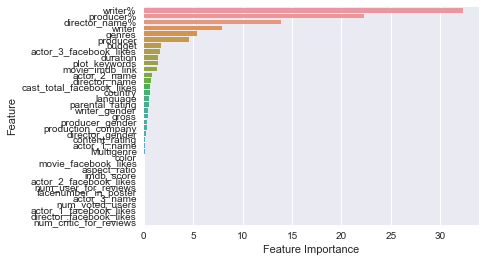

In [28]:
#bar graph importance matrix
barX = [val[0] for val in importanceMatrix]
barY = [val[1] for val in importanceMatrix]

barX.reverse()
barY.reverse()

ax = sns.barplot(x=barY, y=barX, orient="h") 
ax.set_xlabel("Feature Importance")
ax.set_ylabel("Feature")

In [ ]:
#Looks like the percentages we used were the most important features for the trees we used in classification.

In [29]:
from sklearn.metrics import confusion_matrix

theMatrix = confusion_matrix(y_test, preds)
print(theMatrix)

[[ 35 119   2  11]
 [  8 270   3  26]
 [  5 129  12  12]
 [  1  14   1 842]]


In [32]:
import itertools
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

Normalized confusion matrix
[[ 0.20958084  0.71257485  0.01197605  0.06586826]
 [ 0.02605863  0.87947883  0.00977199  0.08469055]
 [ 0.03164557  0.8164557   0.07594937  0.07594937]
 [ 0.0011655   0.01631702  0.0011655   0.98135198]]


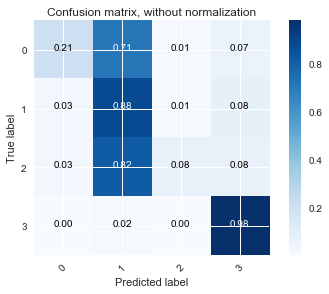

In [34]:
plot_confusion_matrix(theMatrix, classes=['0', '1','2','3'], normalize=True, title='Confusion matrix, without normalization')

In [ ]:
#Really good at detecting 1s and 3s here, with either no talking women or the true label.

In [ ]:
#Binary classification problem: is 100% accuracy due to prevalence of FAILS. Its easy to predict 0s.
#Rating accuracy is much lower. This is a much harder problem to get right.
#Lets look at original bechdel dataset
bechdelClean = pd.read_csv('bechdel_clean.csv')
ids = []
for imdb_id in bechdelClean.imdb_id.values:
    ids.append(imdb_id)
     
reducedDataset = bechdelDataset[bechdelDataset.imdb_id.isin(ids)]
print(reducedDataset)

In [ ]:
train, test = train_test_split(reducedDataset, test_size=test_size)

reducedDataset = reducedDataset.fillna('')
colNames = [col for col in reducedDataset.columns.values if col not in ['Unnamed: 0.1', 'Unnamed: 0', 'id', 'imdb_id', 'Rating', 'test', 'clean_test', 'Unnamed: 0_y', 'binary', 'domgross',	'intgross',	'budget_2013$','domgross_2013$','intgross_2013$','box_office','adjusted_box_office']]
a = 0
for col in colNames:
    a += 1

X_train, y_train = train[colNames], train['Rating']
model = catboost.CatBoostClassifier(iterations=2, learning_rate=1, depth=2, loss_function='Logloss')

cat_features = []
i = 0
for col in colNames:
    if (reducedDataset[col].dtype == 'object' and col != 'imdb_score'):
       cat_features.append(i)
    i += 1

trainPool = Pool(X_train, y_train, cat_features)
model.fit(trainPool)
print(model)

X_test, y_test = test[colNames], test['Rating']
print(y_test.values)
print(len(y_test))
testPool = Pool(X_test, y_test, cat_features)
preds_class  = model.predict(testPool)


In [ ]:
from sklearn.metrics import accuracy_score

print(preds_class)
print(len(preds_class))
accuracy = accuracy_score(y_test, preds_class)
print("Accuracy: %.2f%%" % (accuracy * 100.0))


In [35]:
#Boosting does very well for both types of classifiers. Now lets do revenue analysis for post 1990 
#American films. This will let us see how the Bechdel test affects revenue.
reducedSet = bechdelDataset[bechdelDataset.country == 'USA']
revenueHollywoodDataset = reducedSet[reducedSet.Year > 1989]
revenueHollywoodDataset.columns.values

array(['Unnamed: 0', 'id', 'imdb_id', 'Rating', 'Title', 'Year',
       'Unnamed: 0_y', 'color', 'director_name', 'num_critic_for_reviews',
       'duration', 'director_facebook_likes', 'actor_3_facebook_likes',
       'actor_2_name', 'actor_1_facebook_likes', 'gross', 'genres',
       'actor_1_name', 'num_voted_users', 'cast_total_facebook_likes',
       'actor_3_name', 'facenumber_in_poster', 'plot_keywords',
       'movie_imdb_link', 'num_user_for_reviews', 'language', 'country',
       'content_rating', 'budget', 'actor_2_facebook_likes', 'imdb_score',
       'aspect_ratio', 'movie_facebook_likes', 'binary', 'test',
       'clean_test', 'domgross', 'intgross', 'budget_2013$',
       'domgross_2013$', 'intgross_2013$', 'producer', 'writer',
       'box_office', 'parental_rating', 'production_company',
       'adjusted_box_office', 'Multigenre', 'director_name%', 'writer%',
       'producer%', 'director_gender', 'producer_gender', 'writer_gender'], dtype=object)

In [36]:
passHollywood = revenueHollywoodDataset[revenueHollywoodDataset.binary == 1]
failHollywood = revenueHollywoodDataset[revenueHollywoodDataset.binary == 0]

204668208.47087815
239472432.6165006


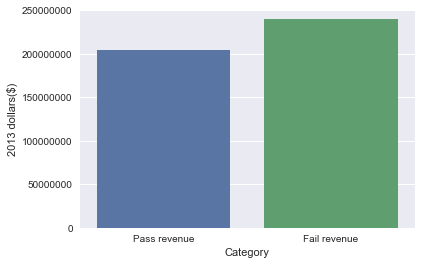

In [67]:
meanPassValue = 0.0
meanPassLen = 0.0
meanFailValue = 0.0
meanFailLen = 0.0
meanPasses = []
meanFails = []

for revenue in passHollywood.adjusted_box_office.values:
    if (int(revenue) != 0):
       meanPasses.append(revenue)

meanPassValue = pd.Series(meanPasses).mean()
meanPassStd = pd.Series(meanPasses).std()    
for revenue in failHollywood.adjusted_box_office.values:
    if (int(revenue) != 0):
        meanFails.append(revenue)  
        
meanFailValue = pd.Series(meanFails).mean()     
meanFailStd = pd.Series(meanFails).std() 

print(meanPassValue)
print(meanFailValue)
    
ax = sns.barplot(x=["Pass revenue", "Fail revenue"], y=[meanPassValue, meanFailValue], orient="v") 
ax.set_ylim(0, 250000000)
ax.ticklabel_format(style='plain', axis='y')
ax.set_ylabel('2013 dollars($)')
ax.set_xlabel('Category')

319198088.28884685
306666574.88085055


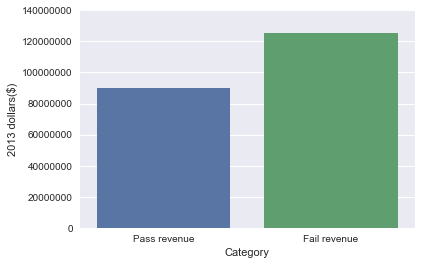

In [37]:
medianPassValue = 0.0
medianPassLen = 0.0
medianFailValue = 0.0
medianFailLen = 0.0
medianPasses = []
medianFails = []

for revenue in passHollywood.adjusted_box_office.values:
    if (int(revenue) != 0):
       medianPasses.append(revenue)

medianPassValue = pd.Series(medianPasses).median()
medianPassStd = pd.Series(medianPasses).std()    
for revenue in failHollywood.adjusted_box_office.values:
    if (int(revenue) != 0):
        medianFails.append(revenue)  
        
medianFailValue = pd.Series(medianFails).median()        
medianFailStd = pd.Series(medianFails).std() 

print(medianPassStd)
print(medianFailStd)
    
ax = sns.barplot(x=["Pass revenue", "Fail revenue"], y=[medianPassValue, medianFailValue], orient="v") 
ax.set_ylim(0, 140000000)
ax.ticklabel_format(style='plain', axis='y')
ax.set_ylabel('2013 dollars($)')
ax.set_xlabel('Category')

In [60]:
#There is a significant difference between medians. Lets look by genre

In [70]:
#Cohen's d and percent variation
def CohenEffectSize(group1, group2):
    """Compute Cohen's d.

    group1: Series or NumPy array
    group2: Series or NumPy array

    returns: float
    """
    diff = group1.mean() - group2.mean()

    n1, n2 = len(group1), len(group2)
    var1 = group1.var()
    var2 = group2.var()

    pooled_var = (n1 * var1 + n2 * var2) / (n1 + n2)
    d = diff / numpy.sqrt(pooled_var)
    return d

print(CohenEffectSize(pd.Series(meanFails), pd.Series(meanPasses)))

0.110848102027


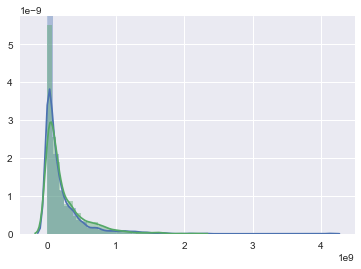

In [72]:
sns.distplot(meanPasses)
sns.distplot(meanFails)

In [ ]:
#this matches our observation of a low cohen's D.

In [46]:
coedTuples = zip(medianPasses, medianFails)
numTotal = 0.0
for pair in coedTuples:
    if (pair[0] > pair[1]):
        numTotal += 1.0

print(numTotal/len(medianPasses))

0.340036563071298


In [79]:
passHollywood

,level_0,index,Unnamed: 0,id,imdb_id,Rating,Title,Year,Unnamed: 0_y,color,...,parental_rating,production_company,adjusted_box_office,Multigenre,director_name%,writer%,producer%,director_gender,producer_gender,writer_gender
0,0,1979,1979,2942,99582.0,3,Flatliners,1990,1902.0,Color,...,R,Sony Pictures Home Entertainment,2.186219e+08,Y,0.200000,1.000000,1.000000,M,M,M
1,1,1983,1983,6542,99938.0,3,Kindergarten Cop,1990,1898.0,Color,...,PG-13,MCA Universal Home Video,0.000000e+00,N,0.545455,1.000000,0.300000,M,M,M
2,2,1984,1984,2379,196378.0,3,Bimbos B.C.,1990,NaN,,...,,,0.000000e+00,Y,1.000000,0.000000,0.000000,M,M,M
3,3,1986,1986,6289,99321.0,3,Criminal Justice,1990,NaN,,...,R,HBO,0.000000e+00,N,1.000000,1.000000,1.000000,M,M,M
4,4,1988,1988,1441,100332.0,3,Paris is Burning,1990,NaN,,...,R,Academy Entertainment,0.000000e+00,N,1.000000,0.000000,1.000000,F,M,M
5,5,1989,1989,2156,100405.0,3,Pretty Woman,1990,2829.0,Color,...,R,Buena Vista,1.089491e+09,Y,0.909091,1.000000,1.000000,M,M,M
6,6,1990,1990,3247,99733.0,3,Happily Ever After,1990,NaN,,...,G,,0.000000e+00,Y,1.000000,1.000000,1.000000,M,M,F
7,7,1992,1992,443,100140.0,3,Mermaids,1990,NaN,,...,PG-13,Orion Home Video,0.000000e+00,Y,0.666667,1.000000,1.000000,M,F,F
8,8,1994,1994,1173,100151.0,3,Mindwalk,1990,NaN,,...,PG,Franco London Films,0.000000e+00,N,1.000000,1.000000,1.000000,M,F,M
9,9,1996,1996,3721,359610.0,3,A Little Night Music,1990,NaN,,...,,,0.000000e+00,Y,1.000000,1.000000,1.000000,M,M,M


In [83]:
from collections import defaultdict
genreDict = defaultdict(list)
genres = list(passHollywood['genres'].values)
failGenres = list(failHollywood['genres'].values)

#passHollywood = passHollywood.reset_index()
#failHollywood = failHollywood.reset_index()

passGenreDict = defaultdict(list)
for a in range(len(passHollywood)):
    if (type(passHollywood.iloc[a]['genres']) is str):
      genres = passHollywood.iloc[a]['genres'].split('||')
      for genre in genres:
        passGenreDict[genre].append((passHollywood.iloc[a]['binary'], passHollywood.iloc[a]['adjusted_box_office']))

print(passGenreDict)        
failGenreDict = defaultdict(list)
for a in range(len(failHollywood)):
    if (type(failHollywood.iloc[a]['genres']) is str):
      genres = failHollywood.iloc[a]['genres'].split('||')
      for genre in genres:
        failGenreDict[genre].append((failHollywood.iloc[a]['binary'], failHollywood.iloc[a]['adjusted_box_office']))
    
genreX = []
genreY = []

failGenreX = []
failGenreY = []

for genre in passGenreDict:
    genreX.append(genre)
    passBoxOffices = []
    genreLen = 0.0
    for value, box_office in genreDict[genre]:
        if (box_office != 0.0 and pd.notnull(box_office) and value == 1):
            passBoxOffices.append(box_office)
            genreLen += 1.0
                                      
    genreY.append(pd.Series(passBoxOffices).median())

for genre in passGenreDict:
    failGenreX.append(genre)
    failBoxOffices = []
    genreLen = 0.0
    for value, box_office in genreDict[genre]:
        if (box_office != 0.0 and pd.notnull(box_office) and value == 0):
            failBoxOffices.append(box_office)
            genreLen += 1.0
                          
    failGenreY.append(pd.Series(failBoxOffices).median())

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
27

1892
1893
1894
1895
1896
1897
1898
1899
1900
1901
1902
1903
1904
1905
1906
1907
1908
1909
1910
1911
1912
1913
1914
1915
1916
1917
1918
1919
1920
1921
1922
1923
1924
1925
1926
1927
1928
1929
1930
1931
1932
1933
1934
1935
1936
1937
1938
1939
1940
1941
1942
1943
1944
1945
1946
1947
1948
1949
1950
1951
1952
1953
1954
1955
1956
1957
1958
1959
1960
1961
1962
1963
1964
1965
1966
1967
defaultdict(<class 'list'>, {'Drama': [(1, 218621858.0), (1, 0.0), (1, 0.0), (1, 0.0), (1, 192479280.0), (1, 0.0), (1, 166686124.0), (1, 0.0), (1, 0.0), (1, 0.0), (1, 1310899333.0), (1, 0.0), (1, 0.0), (1, 0.0), (1, 0.0), (1, 0.0), (1, 695376938.0), (1, 0.0), (1, 0.0), (1, 4200140.0), (1, 951216821.0), (1, 0.0), (1, 0.0), (1, 0.0), (1, 398440153.0), (1, 0.0), (1, 0.0), (1, 0.0), (1, 0.0), (1, 159957554.0), (1, 0.0), (1, 0.0), (1, 0.0), (1, 0.0), (1, 0.0), (1, 83985017.0), (1, 0.0), (1, 0.0), (1, 0.0), (1, 0.0), (1, 0.0), (1, 1064998555.0), (1, 112571937.90000001), (1, 0.0), (1, 0.0), (1, 0.0), (1, 0.0), (1, 10324

103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
277
278
279
280
281
282
283
284
285
286
287
288
289
290
291
292
293
294
295
296
297
298
299
300
301
302
303
304
305
306
307
308
309
310
311
312
313
314
315
316
317
318
319
320
321
322
323
324
325
326
327
328
329
330
331
332
333
334
335
336
337
338
339
340
341
342
343
344
345
346
347
348
349
350
351
352


In [84]:
#scenarios
genres = []
scenarios = []
revenues = []
print(genreY)
for i in range(len(genreX)):
   genres.append(genreX[i])
   genres.append(failGenreX[i])
   scenarios.append("pass")
   scenarios.append("fail")
   if (pd.isnull(genreY[i])):
      genreY[i] = 0.0
   revenues.append(genreY[i]) 
   if (pd.isnull(failGenreY[i])):
      failGenreY[i] = 0.0  
   revenues.append(failGenreY[i])
      

[nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan]


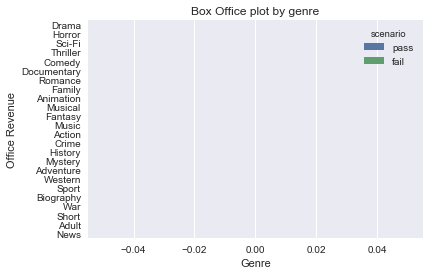

In [85]:
theData = pd.DataFrame({"genre": genres, "scenario": scenarios, "revenue": revenues}) 
    
ax = sns.barplot(x="revenue", y="genre", hue='scenario', data=theData, orient='h')
ax.set_ylabel("Office Revenue")
ax.set_xlabel("Genre")
ax.set_title("Box Office plot by genre")

In [66]:
print(theData)

          genre  revenue scenario
0         Drama      0.0     pass
1         Drama      0.0     fail
2        Horror      0.0     pass
3        Horror      0.0     fail
4        Sci-Fi      0.0     pass
5        Sci-Fi      0.0     fail
6      Thriller      0.0     pass
7      Thriller      0.0     fail
8        Comedy      0.0     pass
9        Comedy      0.0     fail
10  Documentary      0.0     pass
11  Documentary      0.0     fail
12      Romance      0.0     pass
13      Romance      0.0     fail
14       Family      0.0     pass
15       Family      0.0     fail
16    Animation      0.0     pass
17    Animation      0.0     fail
18      Musical      0.0     pass
19      Musical      0.0     fail
20      Fantasy      0.0     pass
21      Fantasy      0.0     fail
22        Music      0.0     pass
23        Music      0.0     fail
24       Action      0.0     pass
25       Action      0.0     fail
26        Crime      0.0     pass
27        Crime      0.0     fail
28      Histor

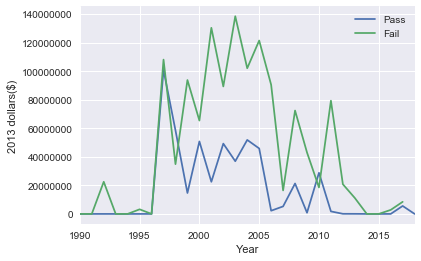

In [49]:
ax = passHollywood.groupby(['Year'])['adjusted_box_office'].median().plot()
failHollywood.groupby(['Year'])['adjusted_box_office'].median().plot()
ax.ticklabel_format(style='plain', axis='y')
ax.set_ylabel('2013 dollars($)')
ax.legend(['Pass', 'Fail'])

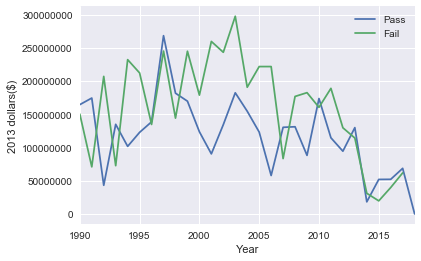

In [59]:
ax = passHollywood.groupby(['Year'])['adjusted_box_office'].mean().plot()
failHollywood.groupby(['Year'])['adjusted_box_office'].mean().plot()
ax.ticklabel_format(style='plain', axis='y')
ax.set_ylabel('2013 dollars($)')
ax.legend(['Pass', 'Fail'])

In [ ]:
#Hmm the dips in the data seem interesting. Otherwise the trend is for Fail to be much higher.

In [ ]:
#Plot 4: median vs mean box office revenue

In [ ]:
#Analysis of genre trends for ones where it matters

In [ ]:
#International and domestic splits

In [ ]:
#How it relates to the budget

In [ ]:
#Hypothesis test for a genre thrown in as well